# Classification Model for Credit Card Fraud Detection

In this Machine Learning Project, we will be analysing the dataset taken from www.kaggle.com related to details of credit card owners. This data consists of features like Gender, Income type, House type, marital status and many more. Our focus will be on analysing the data, getting the insights related to these features and there role in affecting the target, we will perform feature engineering, feature selection and develop a Classification model that will predict whether it is a Fraud or not based on the new data.

## Importing the Important Libraries required

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.combine import SMOTETomek
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

pd.set_option('display.max_columns', None)

## Reading the 'credit_dataset.csv' Dataset

In [2]:
# reading dataset as DataFrame by pandas
credit_df = pd.read_csv('credit_dataset.csv')

In [3]:
# observing the data that we have
credit_df

,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2,29,59,3,0
1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,4,52,8,0
2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,26,52,8,0
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,26,52,8,0
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,38,52,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2,11,48,7,1
25130,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,1,2,23,34,4,1
25131,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,1,0,1,1,2,32,34,4,1
25132,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2,9,49,2,1


It can be observed that in total we have 25134 rows and 19 columns(features) i.e id, gender, car, reality, no_of_child, income, income_type, education_type, family_type, house_type, flag_mobil, work_phone, phone, e_mail, family size, begin_month, age, years_employed, target.

In [4]:
# understanding the features that we have in the dataset
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              25134 non-null  int64  
 1   GENDER          25134 non-null  object 
 2   CAR             25134 non-null  object 
 3   REALITY         25134 non-null  object 
 4   NO_OF_CHILD     25134 non-null  int64  
 5   INCOME          25134 non-null  float64
 6   INCOME_TYPE     25134 non-null  object 
 7   EDUCATION_TYPE  25134 non-null  object 
 8   FAMILY_TYPE     25134 non-null  object 
 9   HOUSE_TYPE      25134 non-null  object 
 10  FLAG_MOBIL      25134 non-null  int64  
 11  WORK_PHONE      25134 non-null  int64  
 12  PHONE           25134 non-null  int64  
 13  E_MAIL          25134 non-null  int64  
 14  FAMILY SIZE     25134 non-null  int64  
 15  BEGIN_MONTH     25134 non-null  int64  
 16  AGE             25134 non-null  int64  
 17  YEARS_EMPLOYED  25134 non-null 

We can observe that we are having numerical and categorical features both, we need to perform encoding on the categorical features inorder to use them in our machine learning model

In [5]:
# Checking for Nan Values in features
credit_df.isnull().sum()

ID                0
GENDER            0
CAR               0
REALITY           0
NO_OF_CHILD       0
INCOME            0
INCOME_TYPE       0
EDUCATION_TYPE    0
FAMILY_TYPE       0
HOUSE_TYPE        0
FLAG_MOBIL        0
WORK_PHONE        0
PHONE             0
E_MAIL            0
FAMILY SIZE       0
BEGIN_MONTH       0
AGE               0
YEARS_EMPLOYED    0
TARGET            0
dtype: int64

The features dont contain any missing values so we dont need to handle any 'Nan' values.

### Exploratory Data Analysis

c:\users\prank\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


<Figure size 432x288 with 0 Axes>

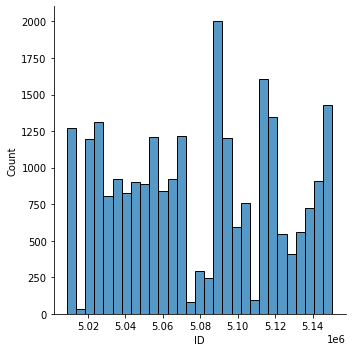

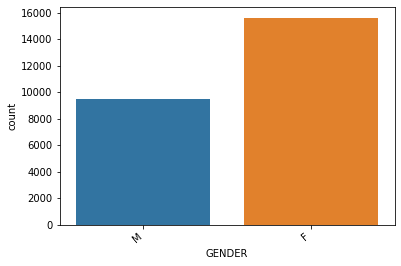

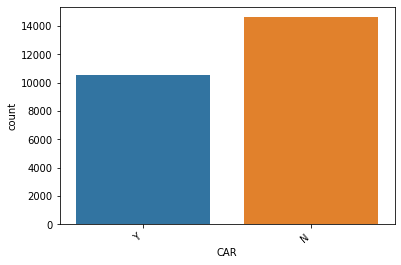

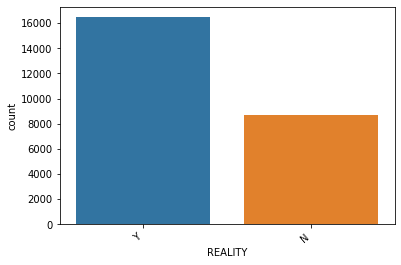

<Figure size 432x288 with 0 Axes>

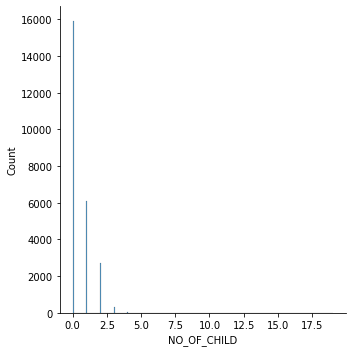

<Figure size 432x288 with 0 Axes>

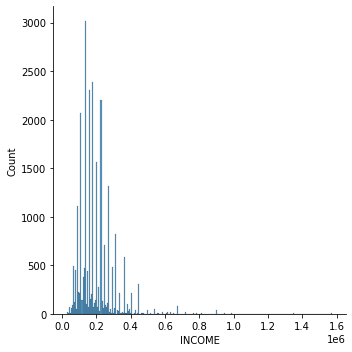

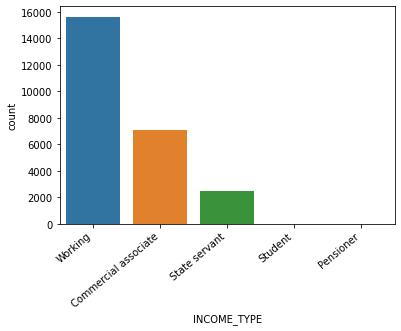

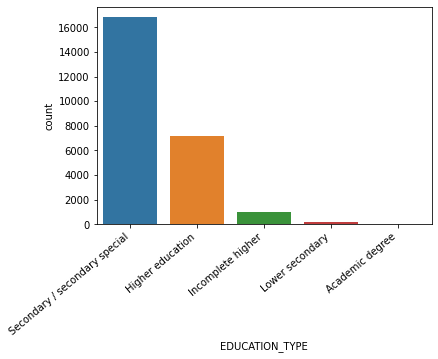

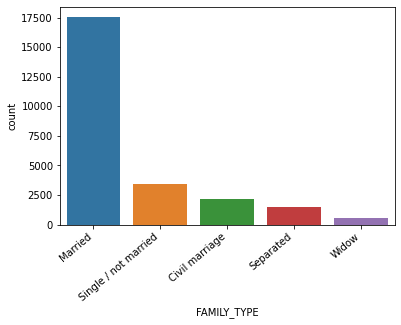

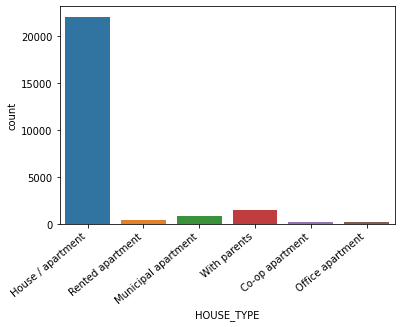

<Figure size 432x288 with 0 Axes>

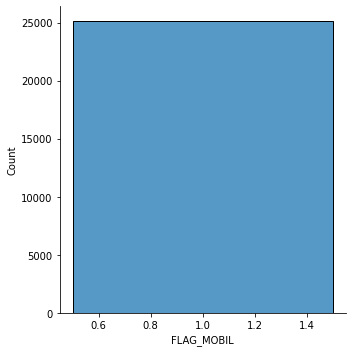

<Figure size 432x288 with 0 Axes>

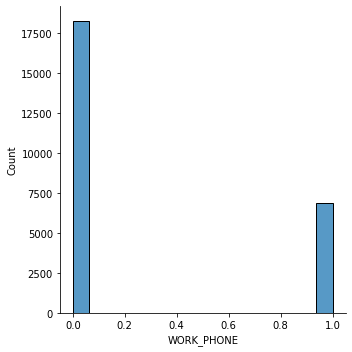

<Figure size 432x288 with 0 Axes>

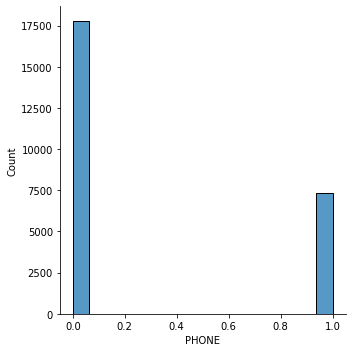

<Figure size 432x288 with 0 Axes>

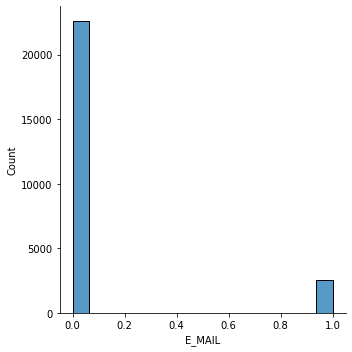

<Figure size 432x288 with 0 Axes>

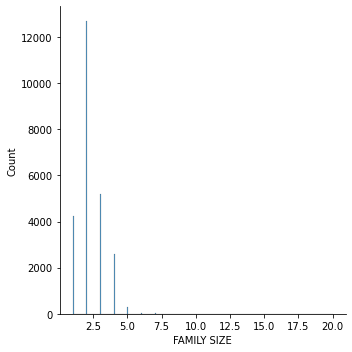

<Figure size 432x288 with 0 Axes>

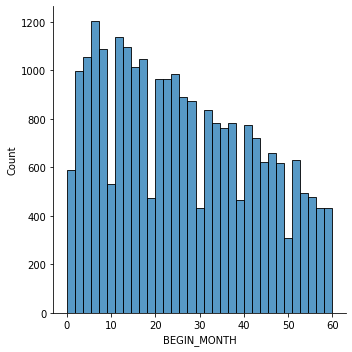

<Figure size 432x288 with 0 Axes>

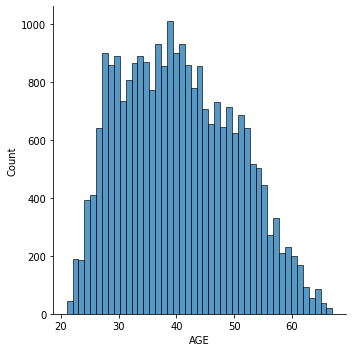

<Figure size 432x288 with 0 Axes>

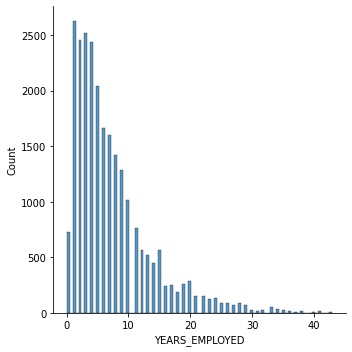

In [6]:
for feature in (features for features in credit_df.columns if features != 'TARGET'):
    if credit_df[feature].dtype == 'O':
        plt.figure()
        g = sns.countplot(x = feature, data = credit_df)
        g.set_xticklabels(g.get_xticklabels(), rotation = 40, ha = "right")
    else:
        plt.figure()
        sns.displot(credit_df[feature])

### Observing Correlation between features

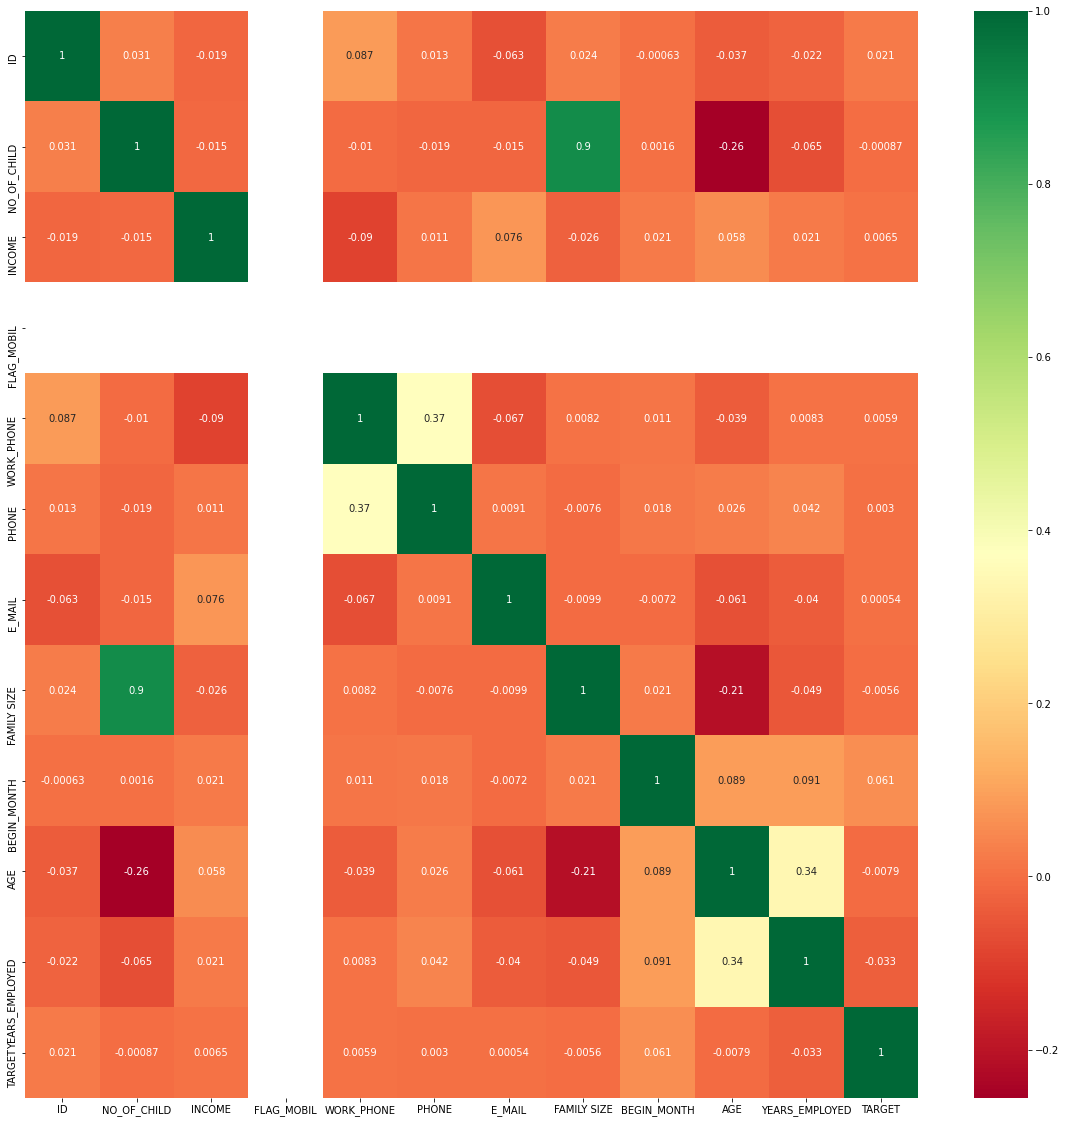

In [7]:
# plotting a Heatmap

corrmat = credit_df.corr()
features = corrmat.index
plt.figure(figsize = [20,20])

g = sns.heatmap(credit_df[features].corr(),annot = True, cmap = "RdYlGn")

In [8]:
# observing the feature FLAG_MOBIL
credit_df['FLAG_MOBIL'].unique()

array([1], dtype=int64)

It can be clearly seen that the column FLAG_MOBIL has no correlation with any of the feature and is just a constant so we can simply drop this column.

In [9]:
# droping FLAG_MOBIL column from dataframe
credit_df.drop('FLAG_MOBIL', axis = 1, inplace = True)

## Categorical Features Encoding

Separating the data into independent and dependent features as our target feature is a categorical feature, we dont have to affect it.

In [10]:
columns = [c for c in credit_df.columns if c not in ['TARGET']]
credit_x = credit_df[columns]
credit_y = credit_df['TARGET']

In [11]:
print(credit_x.shape,' ',credit_y.shape)

(25134, 17)   (25134,)


In [12]:
# creating a list of categorical features
cat_feat = [features for features in credit_x.columns if credit_x[features].dtype == 'O']
print(cat_feat)

['GENDER', 'CAR', 'REALITY', 'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE']


In [13]:
# checking the cardinality of each categorical feature

for feature in cat_feat:
    print("Cardinality of {} : {}".format(feature, credit_x[feature].nunique()))
    print("Unique values of {} : {}".format(feature, credit_x[feature].unique()))
    print('')

Cardinality of GENDER : 2
Unique values of GENDER : ['M' 'F']

Cardinality of CAR : 2
Unique values of CAR : ['Y' 'N']

Cardinality of REALITY : 2
Unique values of REALITY : ['Y' 'N']

Cardinality of INCOME_TYPE : 5
Unique values of INCOME_TYPE : ['Working' 'Commercial associate' 'State servant' 'Student' 'Pensioner']

Cardinality of EDUCATION_TYPE : 5
Unique values of EDUCATION_TYPE : ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

Cardinality of FAMILY_TYPE : 5
Unique values of FAMILY_TYPE : ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']

Cardinality of HOUSE_TYPE : 6
Unique values of HOUSE_TYPE : ['House / apartment' 'Rented apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']



As it can be observed that the cardinality of the categorical features is not very high so we can encode them easily by One Hot Encoding.

In [14]:
# Encoding the categorical features 
for feature in cat_feat:
    encoded = pd.get_dummies(credit_x[feature], prefix = feature, drop_first = True)
    credit_x.drop(feature, axis = 1, inplace = True)
    credit_x = pd.concat([credit_x, encoded], axis = 1)

c:\users\prank\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
# observing the data after encoding
credit_x.head()

,ID,NO_OF_CHILD,INCOME,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,GENDER_M,CAR_Y,REALITY_Y,INCOME_TYPE_Pensioner,INCOME_TYPE_State servant,INCOME_TYPE_Student,INCOME_TYPE_Working,EDUCATION_TYPE_Higher education,EDUCATION_TYPE_Incomplete higher,EDUCATION_TYPE_Lower secondary,EDUCATION_TYPE_Secondary / secondary special,FAMILY_TYPE_Married,FAMILY_TYPE_Separated,FAMILY_TYPE_Single / not married,FAMILY_TYPE_Widow,HOUSE_TYPE_House / apartment,HOUSE_TYPE_Municipal apartment,HOUSE_TYPE_Office apartment,HOUSE_TYPE_Rented apartment,HOUSE_TYPE_With parents
0,5008806,0,112500.0,0,0,0,2,29,59,3,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
1,5008808,0,270000.0,0,1,1,1,4,52,8,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
2,5008809,0,270000.0,0,1,1,1,26,52,8,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
3,5008810,0,270000.0,0,1,1,1,26,52,8,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
4,5008811,0,270000.0,0,1,1,1,38,52,8,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0


In [16]:
# droping the ID column as it is a unique id and wont affect the target
credit_x.drop('ID', axis = 1, inplace = True)
credit_x.head()

,NO_OF_CHILD,INCOME,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,GENDER_M,CAR_Y,REALITY_Y,INCOME_TYPE_Pensioner,INCOME_TYPE_State servant,INCOME_TYPE_Student,INCOME_TYPE_Working,EDUCATION_TYPE_Higher education,EDUCATION_TYPE_Incomplete higher,EDUCATION_TYPE_Lower secondary,EDUCATION_TYPE_Secondary / secondary special,FAMILY_TYPE_Married,FAMILY_TYPE_Separated,FAMILY_TYPE_Single / not married,FAMILY_TYPE_Widow,HOUSE_TYPE_House / apartment,HOUSE_TYPE_Municipal apartment,HOUSE_TYPE_Office apartment,HOUSE_TYPE_Rented apartment,HOUSE_TYPE_With parents
0,0,112500.0,0,0,0,2,29,59,3,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
1,0,270000.0,0,1,1,1,4,52,8,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
2,0,270000.0,0,1,1,1,26,52,8,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
3,0,270000.0,0,1,1,1,26,52,8,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
4,0,270000.0,0,1,1,1,38,52,8,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0


## Checking if our data is balanced or imbalanced

Text(0, 0.5, 'Frequency')

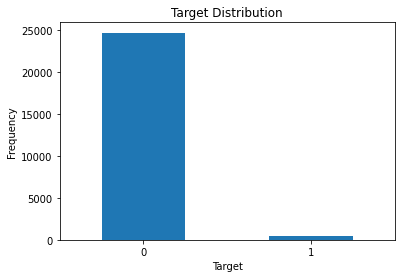

In [17]:
Target = pd.value_counts(credit_y, sort = True)
Target.plot(kind = 'bar', rot = 0)
plt.title("Target Distribution")
plt.xlabel("Target")
plt.ylabel("Frequency")

It can be clearly seen from the above bar chart that our data is immensely imbalanced, so any model made on such dataset will be definately biased. Such imbalanced dataset can be handled either by 'Undersampling' or 'Oversampling' technique.

- Random Oversampling: Randomly duplicate examples in the minority class.
- Random Undersampling: Randomly delete examples in the majority class.

The major issue with undersampling is that we might miss the important records which can affect our model's prediction, so mostly oversampling is prefered.

Some of the more widely used and implemented oversampling methods include:

- Random Oversampling
- Synthetic Minority Oversampling Technique (SMOTE)
- Borderline-SMOTE
- Borderline Oversampling with SVM
- Adaptive Synthetic Sampling (ADASYN)

In [18]:
# we will be using Synthetic Minority Oversampling Technique (SMOTE) method

smk = SMOTETomek()
credit_x_res, credit_y_res = smk.fit_resample(credit_x, credit_y)

In [19]:
# Observing the data before and after oversampling

print(credit_x.shape,credit_y.shape)
print(credit_x_res.shape,credit_y_res.shape)

(25134, 29) (25134,)
(49330, 29) (49330,)


## Feature Scaling 

In [20]:
# scaling the features by MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(credit_x_res)

In [21]:
# as MinMaxScaler returns a array so we are converting it to a DataFrame

credit_x_res = pd.DataFrame(scaled_features,columns = credit_x.columns)
credit_x_res.head()

,NO_OF_CHILD,INCOME,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,GENDER_M,CAR_Y,REALITY_Y,INCOME_TYPE_Pensioner,INCOME_TYPE_State servant,INCOME_TYPE_Student,INCOME_TYPE_Working,EDUCATION_TYPE_Higher education,EDUCATION_TYPE_Incomplete higher,EDUCATION_TYPE_Lower secondary,EDUCATION_TYPE_Secondary / secondary special,FAMILY_TYPE_Married,FAMILY_TYPE_Separated,FAMILY_TYPE_Single / not married,FAMILY_TYPE_Widow,HOUSE_TYPE_House / apartment,HOUSE_TYPE_Municipal apartment,HOUSE_TYPE_Office apartment,HOUSE_TYPE_Rented apartment,HOUSE_TYPE_With parents
0,0.0,0.055233,0.0,0.0,0.0,0.052632,0.483333,0.826087,0.069767,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.156977,0.0,1.0,1.0,0.000000,0.066667,0.673913,0.186047,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.156977,0.0,1.0,1.0,0.000000,0.433333,0.673913,0.186047,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.156977,0.0,1.0,1.0,0.000000,0.433333,0.673913,0.186047,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.156977,0.0,1.0,1.0,0.000000,0.633333,0.673913,0.186047,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


## Train Test Split for model training

In [22]:
# splitting data into train and test

x_train,x_test,y_train,y_test = train_test_split(credit_x_res, credit_y_res, test_size = 0.4)
print(x_train.shape,' ',y_train.shape)
print(x_test.shape,' ',y_test.shape)

(29598, 29)   (29598,)
(19732, 29)   (19732,)


## Building our Classification Model

In [23]:
# creating Knearestneighbor model for k = 3

model = KNeighborsClassifier(n_neighbors = 3, metric = "euclidean")
model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [24]:
# making predictions for test data
predictions = model.predict(x_test)

In [25]:
# accuracy score for predictions made on test data
print(metrics.accuracy_score(y_test, predictions))

0.9708088384350294


In [26]:
# Confusion matrix to evaluate the performance of the KNN model
metrics.confusion_matrix(y_test, predictions)

array([[9307,  480],
       [  96, 9849]], dtype=int64)

Our model is giving good accuracy of >90% and from confusion matrix we can see that our model is performing well for k=3, thus we can select this value or we can visualize the variation in accuracy score with k.

## Identifying the best value of K

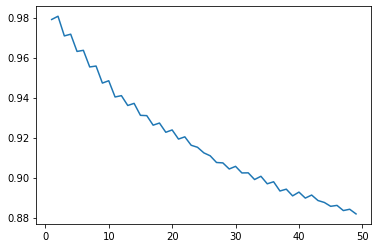

In [27]:
# building KNN model for values of k from 1 to 50 and evaluating the accuracy score
accuracy_score = []

k_vals = [i for i in range(1,50)]

for k in k_vals:
    model = KNeighborsClassifier(n_neighbors = k,metric='euclidean', n_jobs = -1)
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    pred = metrics.accuracy_score(y_test, predictions)
    accuracy_score.append(pred)

plt.plot(k_vals, accuracy_score)

KNearestNeighbors classification model is performing well for k=3 but you can vary the value K by comparing the accuracy score that we are getting in the above graph. We usually take the K value after which we tend to get a constant accuracy because it is considered to be the best K at which our model performs well consistently.